In [1]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

C:\Users\kalle\AppData\Local\Temp\ipykernel_22524\1375792773.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


(3131, 7)
                  open        high         low   adj_close    volume  \
date                                                                   
2022-06-03  146.899994  147.970001  144.460007  144.937912  88570300   
2022-06-06  147.029999  148.570007  144.899994  145.695602  71598400   
2022-06-07  144.350006  149.000000  144.100006  148.257782  67808200   
2022-06-08  148.580002  149.869995  147.460007  147.510071  53950200   
2022-06-09  147.080002  147.949997  142.529999  142.206238  69473000   

                 close  
date                    
2022-06-03  145.380005  
2022-06-06  146.139999  
2022-06-07  148.710007  
2022-06-08  147.960007  
2022-06-09  142.639999  
date
2010-01-04      7.643214
2010-01-05      7.656429
2010-01-06      7.534643
2010-01-07      7.520714
2010-01-08      7.570714
                 ...    
2022-06-03    145.380005
2022-06-06    146.139999
2022-06-07    148.710007
2022-06-08    147.960007
2022-06-09    142.639999
Name: close, Length: 3131, dty

<Axes: xlabel='date'>

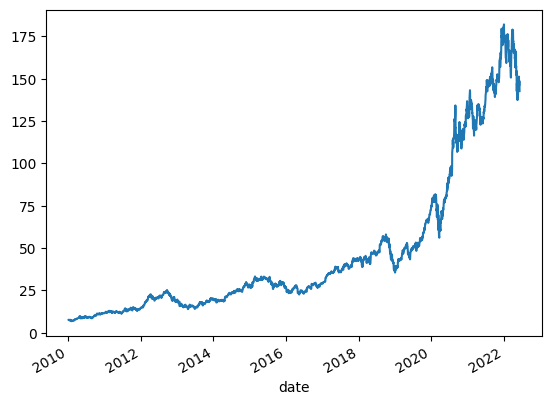

In [2]:
data= pd.read_csv('AAPLfull.csv')
print(data.shape)
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)
print(data.tail())
close=data['close']
print(close)
close.plot()

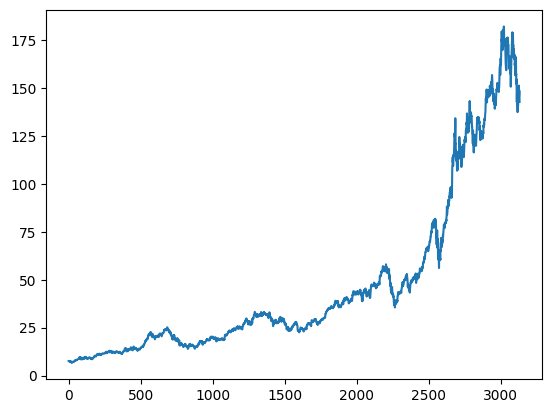

In [3]:
closedata=close.values
closedata
plt.plot(closedata)

In [4]:
scaler = MinMaxScaler(feature_range=(0,1))
closedata_scaled = scaler.fit_transform(np.array(closedata).reshape(-1,1))
len(closedata), len(closedata_scaled)
print(closedata_scaled)

[[0.00447776]
 [0.00455321]
 [0.00385789]
 ...
 [0.80987847]
 [0.80559646]
 [0.77522263]]


In [5]:
train_size=int(len(closedata_scaled)*0.7)
test_size=len(closedata_scaled)-train_size
print(train_size,test_size)

2191 940


In [6]:
stock_train, stock_test = closedata_scaled[0:train_size,:], closedata_scaled[train_size:len(closedata_scaled),:1]
print(len(stock_train),len(stock_test))

2191 940


In [7]:
def create_ds(dataset,step):
    Xtrain, Ytrain = [], []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        Xtrain.append(a)
        Ytrain.append(dataset[i + step, 0])
    return np.array(Xtrain), np.array(Ytrain)

In [8]:
time_stamp = 200
X_train, y_train = create_ds(stock_train,time_stamp)
X_test, y_test = create_ds(stock_test,time_stamp)

In [9]:
print(X_train.shape)
print(y_train.shape)

(1990, 200)
(1990,)


In [10]:
print(X_test.shape)
print(y_test.shape)

(739, 200)
(739,)


In [11]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [12]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1,activation='linear'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 200, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 200, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=80)

Epoch 1/100
25/25 [==============================] - 21s 487ms/step - loss: 3.4207e-05 - val_loss: 4.2603e-04
Epoch 2/100
25/25 [==============================] - 9s 352ms/step - loss: 7.6187e-06 - val_loss: 3.3365e-04
Epoch 3/100
25/25 [==============================] - 9s 342ms/step - loss: 5.4247e-06 - val_loss: 2.8309e-04
Epoch 4/100
25/25 [==============================] - 9s 355ms/step - loss: 5.4846e-06 - val_loss: 3.3921e-04
Epoch 5/100
25/25 [==============================] - 9s 361ms/step - loss: 5.5275e-06 - val_loss: 3.7837e-04
Epoch 6/100
25/25 [==============================] - 9s 362ms/step - loss: 5.4190e-06 - val_loss: 3.0225e-04
Epoch 7/100
25/25 [==============================] - 9s 370ms/step - loss: 5.5440e-06 - val_loss: 2.9097e-04
Epoch 8/100
25/25 [==============================] - 9s 366ms/step - loss: 5.4057e-06 - val_loss: 2.7863e-04
Epoch 9/100
25/25 [==============================] - 9s 365ms/step - loss: 5.8834e-06 - val_loss: 4.0377e-04
Epoch 10/100
25/25

In [58]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)


24/24 [==============================] - 2s 67ms/step


In [59]:
prediction_train=scaler.inverse_transform(train_predict)
prediction_test=scaler.inverse_transform(test_predict)

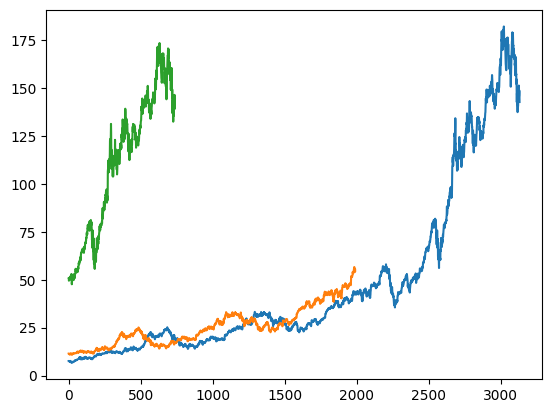

In [60]:
plt.plot(scaler.inverse_transform(closedata_scaled))
plt.plot(prediction_train)
plt.plot(prediction_test)

In [61]:
np.set_printoptions(threshold=np.inf)
test=np.vstack((prediction_train,prediction_test))
print(test)

[[ 11.500559 ]
 [ 11.224096 ]
 [ 11.258897 ]
 [ 11.220818 ]
 [ 11.150752 ]
 [ 11.194691 ]
 [ 11.167913 ]
 [ 11.161894 ]
 [ 11.076287 ]
 [ 10.934084 ]
 [ 11.039097 ]
 [ 11.212306 ]
 [ 11.33229  ]
 [ 11.521713 ]
 [ 11.489546 ]
 [ 11.543523 ]
 [ 11.45882  ]
 [ 11.523413 ]
 [ 11.475418 ]
 [ 11.185778 ]
 [ 11.1479435]
 [ 10.959562 ]
 [ 10.919131 ]
 [ 11.18099  ]
 [ 11.127517 ]
 [ 11.354987 ]
 [ 11.204338 ]
 [ 11.410981 ]
 [ 11.418587 ]
 [ 11.484246 ]
 [ 11.293079 ]
 [ 11.467199 ]
 [ 11.523867 ]
 [ 11.502396 ]
 [ 11.594269 ]
 [ 11.530168 ]
 [ 11.625253 ]
 [ 11.583711 ]
 [ 11.611892 ]
 [ 11.64933  ]
 [ 11.60415  ]
 [ 11.607115 ]
 [ 11.636769 ]
 [ 11.615883 ]
 [ 11.670278 ]
 [ 11.737864 ]
 [ 11.772159 ]
 [ 11.721801 ]
 [ 11.758711 ]
 [ 11.784994 ]
 [ 11.779627 ]
 [ 11.725234 ]
 [ 11.687691 ]
 [ 11.922061 ]
 [ 11.981565 ]
 [ 12.07763  ]
 [ 12.071707 ]
 [ 12.15455  ]
 [ 12.368945 ]
 [ 12.344601 ]
 [ 12.441972 ]
 [ 12.485396 ]
 [ 12.581833 ]
 [ 12.318973 ]
 [ 12.25793  ]
 [ 12.045562 ]
 [ 11.8413

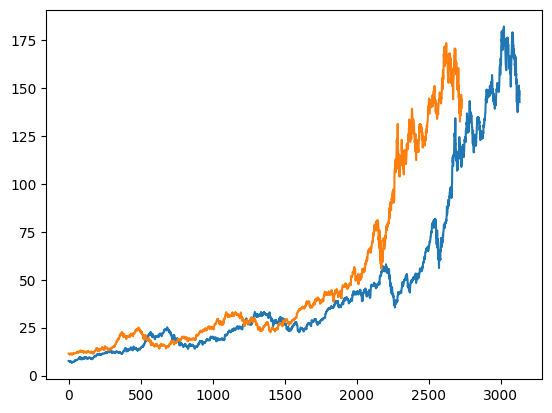

In [62]:
plt.plot(scaler.inverse_transform(closedata_scaled))
plt.plot(test)

In [63]:
len(stock_test)
inp=stock_test[839:]
print(len(stock_test))

940


In [64]:
inp=inp.reshape(1,-1)
temp_inp=list(inp)
inp.shape

(1, 101)

In [65]:
temp_inp=temp_inp[0].tolist()

In [66]:
# Predicting next 60 days price using the current data
lst_output = []
n_steps = 100
i = 0
while i < 60:  # Change this line to predict the next 60 days
    if len(closedata_scaled) > 100:
        inp = np.array(temp_inp[1:])
        inp = inp.reshape(1, -1)
        inp = inp.reshape((1, n_steps, 1))
        yhat = model.predict(inp, verbose=0)
        temp_inp.extend(yhat[0].tolist())
        temp_inp = temp_inp[1:]
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        inp = inp.reshape((1, n_steps, 1))
        yhat = model.predict(inp, verbose=0)
        temp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1

print(lst_output)


[[0.7399393916130066], [0.7059416174888611], [0.6747909784317017], [0.646718442440033], [0.6217098236083984], [0.5996705889701843], [0.5804235339164734], [0.5637058019638062], [0.5491896271705627], [0.5365152955055237], [0.5253248810768127], [0.5152890086174011], [0.5061243772506714], [0.4976021349430084], [0.48954856395721436], [0.48184123635292053], [0.4744010865688324], [0.46718379855155945], [0.46016982197761536], [0.45335617661476135], [0.4467490613460541], [0.44035765528678894], [0.43419042229652405], [0.4282524883747101], [0.4225439727306366], [0.4170602858066559], [0.41179221868515015], [0.40672650933265686], [0.4018478989601135], [0.39713937044143677], [0.3925836980342865], [0.38816437125205994], [0.38386595249176025], [0.3796748220920563], [0.375579297542572], [0.37156951427459717], [0.3676377534866333], [0.3637780249118805], [0.3599858582019806], [0.3562580645084381], [0.3525923490524292], [0.34898725152015686], [0.3454417586326599], [0.3419550657272339], [0.3385266959667206

In [67]:
len(closedata_scaled)

3131

In [68]:
new_plot=np.arange(1,101)
pred_plot=np.arange(101,161)
# print(new_plot)
# print(pred_plot)

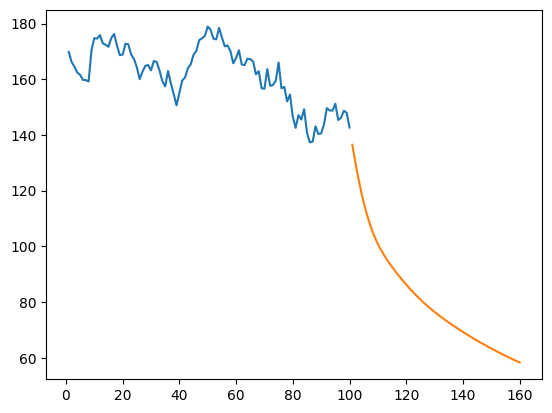

In [69]:
plt.plot(new_plot, scaler.inverse_transform(closedata_scaled[3031:]))
plt.plot(pred_plot, scaler.inverse_transform(lst_output))

In [26]:
new_ds=closedata_scaled.tolist()

In [27]:
len(new_ds)

3131

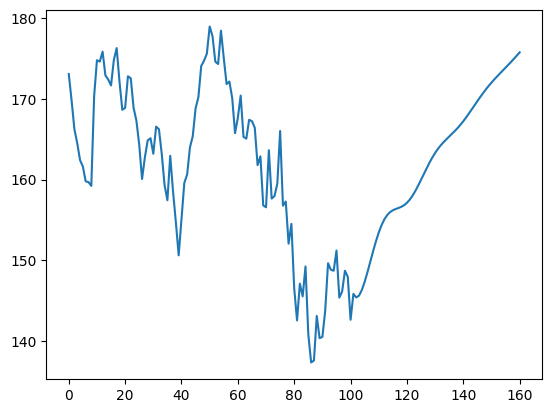

In [28]:
new_ds.extend(lst_output)
plt.plot(scaler.inverse_transform(new_ds[3030:]))

In [29]:
final_pred=scaler.inverse_transform(new_ds).tolist()
final_graph = scaler.inverse_transform(new_ds).tolist()
print(final_pred)

[[7.643214], [7.656428999999999], [7.534643], [7.520714], [7.570713999999999], [7.503928999999999], [7.418571], [7.523214], [7.479643000000001], [7.354643], [7.68], [7.561786], [7.431071], [7.0625], [7.2525], [7.355], [7.424286], [7.117499999999999], [6.859285999999999], [6.954643], [6.995], [7.115357], [6.858929], [6.980714], [6.932857000000001], [7.006785999999999], [6.968571], [7.095357000000001], [7.156428999999999], [7.264286], [7.233929], [7.2475], [7.202500000000001], [7.157856999999999], [7.037857], [7.166428999999999], [7.214286], [7.307857], [7.463929], [7.458929], [7.476071], [7.525357], [7.819643], [7.824286], [7.964999999999999], [8.03], [8.053571], [8.092857], [7.994286], [8.016071], [8.004286], [8.023214], [7.9375], [8.026786], [8.155714], [8.191786], [8.094643], [8.246429], [8.299643], [8.423214], [8.392857], [8.4275], [8.5175], [8.555], [8.592857], [8.569643], [8.635357], [8.653214], [8.658214], [8.774643], [8.89], [8.835714], [8.823929], [8.735357], [9.257857], [9.516

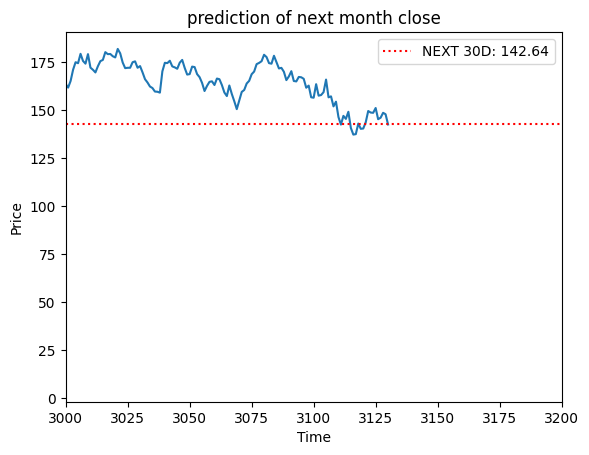

In [39]:
plt.xlim(3000,3200)
plt.plot(final_graph,)
plt.ylabel("Price")
plt.xlabel("Time")
plt.title("prediction of next month close")
plt.axhline(y=final_graph[len(final_graph)-1], color = 'red', linestyle = ':', label = 'NEXT 30D: {0}'.format(round(float(*final_graph[len(final_graph)-1]),2)))
plt.legend()

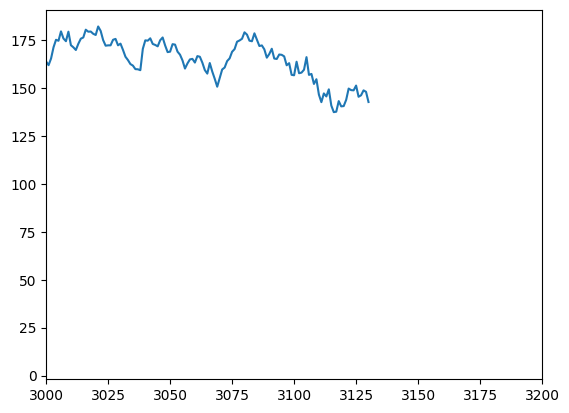

In [85]:
plt.xlim(3000, 3200)
plt.plot(closedata)



          date        open        high         low       close   adj_close  \
0   2022-06-10  140.279999  140.759995  137.059998  137.130005  136.712997   
1   2022-06-13  132.869995  135.199997  131.440002  131.880005  131.478958   
2   2022-06-14  133.130005  133.889999  131.479996  132.759995  132.356277   
3   2022-06-15  134.289993  137.339996  132.160004  135.429993  135.018158   
4   2022-06-16  132.080002  132.389999  129.039993  130.059998  129.664490   
..         ...         ...         ...         ...         ...         ...   
56  2022-08-31  160.309998  160.580002  157.139999  157.220001  156.959625   
57  2022-09-01  156.639999  158.419998  154.669998  157.960007  157.698410   
58  2022-09-02  159.750000  160.360001  154.970001  155.809998  155.551956   
59  2022-09-06  156.470001  157.089996  153.690002  154.529999  154.274078   
60  2022-09-07  154.820007  156.669998  153.610001  155.960007  155.701721   

       volume  
0    91437900  
1   122207100  
2    84784300  

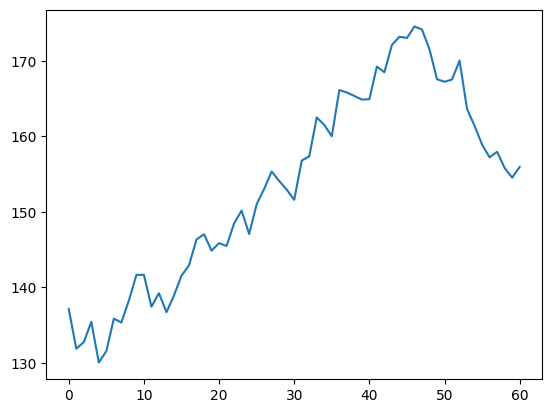

In [40]:
real=pd.read_csv("real.csv")
print(real)
real_close=real['close']
plt.plot(real_close)

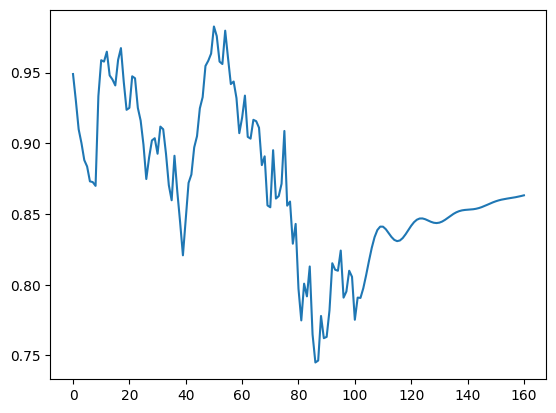

In [41]:
new_ds.extend(lst_output)
plt.plot(new_ds[3030:])

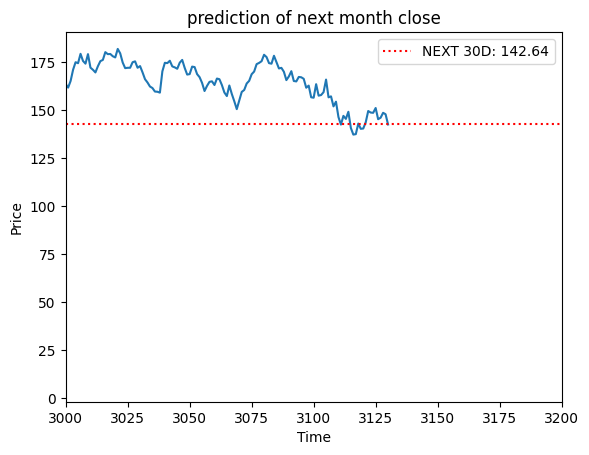

In [42]:
plt.xlim(3000,3200)
plt.plot(final_graph,)
plt.ylabel("Price")
plt.xlabel("Time")
plt.title("prediction of next month close")
plt.axhline(y=final_graph[len(final_graph)-1], color = 'red', linestyle = ':', label = 'NEXT 30D: {0}'.format(round(float(*final_graph[len(final_graph)-1]),2)))
plt.legend()